<a href="https://colab.research.google.com/github/Geez-l/Project_197/blob/glee-branch/ML_algorithms/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### machine learning algorithms ####
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split

#### metrics of evaluation ####
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import PredictionErrorDisplay

### time series ###
from statsmodels.tsa.seasonal import seasonal_decompose

#### Other libraries #####
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder


# Read the dataset from github

In [2]:
## from github
url = "https://raw.githubusercontent.com/Geez-l/Project_197/glee-branch/dataset/dataset.csv"
dataset = pd.read_csv(url)

dataset.head()

,Date,Croptype,Province,Area,Production,Yield
0,1987-01-01,Irrigated Palay,Aklan,6130.0,19309.0,3.149918
1,1987-01-01,Irrigated Palay,Antique,9030.0,28275.0,3.131229
2,1987-01-01,Irrigated Palay,Capiz,6300.0,18540.0,2.942857
3,1987-01-01,Irrigated Palay,Guimaras,6300.0,18540.0,2.942857
4,1987-01-01,Irrigated Palay,Iloilo,21270.0,58187.0,2.735637


In [3]:
dataset.columns

Index(['Date', 'Croptype', 'Province', 'Area', 'Production', 'Yield'], dtype='object')

In [4]:
dataset.head()

,Date,Croptype,Province,Area,Production,Yield
0,1987-01-01,Irrigated Palay,Aklan,6130.0,19309.0,3.149918
1,1987-01-01,Irrigated Palay,Antique,9030.0,28275.0,3.131229
2,1987-01-01,Irrigated Palay,Capiz,6300.0,18540.0,2.942857
3,1987-01-01,Irrigated Palay,Guimaras,6300.0,18540.0,2.942857
4,1987-01-01,Irrigated Palay,Iloilo,21270.0,58187.0,2.735637


# Create features from the date


In [5]:
def create_features(dataset):


    # creating a copy
    dataset1 = dataset.copy()

    # convert 'Date' column to datetime, coercing errors to NaT (Not a Time)
    dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

    # extracting year, month, quarter from Date
    dataset['Year'] = dataset['Date'].dt.year
    dataset['Month'] = dataset['Date'].dt.month
    dataset['Quarter'] = dataset['Date'].dt.quarter

    return dataset

dataset1 = create_features(dataset)
dataset1.head()


,Date,Croptype,Province,Area,Production,Yield,Year,Month,Quarter
0,1987-01-01,Irrigated Palay,Aklan,6130.0,19309.0,3.149918,1987,1,1
1,1987-01-01,Irrigated Palay,Antique,9030.0,28275.0,3.131229,1987,1,1
2,1987-01-01,Irrigated Palay,Capiz,6300.0,18540.0,2.942857,1987,1,1
3,1987-01-01,Irrigated Palay,Guimaras,6300.0,18540.0,2.942857,1987,1,1
4,1987-01-01,Irrigated Palay,Iloilo,21270.0,58187.0,2.735637,1987,1,1


# One hot encoding for categorical variable

In [6]:
unique = dataset1['Croptype'].unique()
print(unique)

unique1 = dataset1['Province'].unique()
print(unique1)

['Irrigated Palay' 'Rainfed Palay' 'Palay' 'White Corn' 'Yellow Corn'
 'Corn']
['Aklan' 'Antique' 'Capiz' 'Guimaras' 'Iloilo']


## One Hot Encoding of Crop Type and Province that has categorical variables

In [7]:
encoding = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
encode_data = encoding.fit_transform(dataset1[['Croptype', 'Province']])

dataset1 = pd.concat([dataset1.reset_index(drop=True), encode_data.reset_index(drop=True)], axis=1)
dataset1 = dataset1.drop(columns=['Croptype', 'Province'])

In [8]:
dataset1.head()

,Date,Area,Production,Yield,Year,Month,Quarter,Croptype_Corn,Croptype_Irrigated Palay,Croptype_Palay,Croptype_Rainfed Palay,Croptype_White Corn,Croptype_Yellow Corn,Province_Aklan,Province_Antique,Province_Capiz,Province_Guimaras,Province_Iloilo
0,1987-01-01,6130.0,19309.0,3.149918,1987,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1987-01-01,9030.0,28275.0,3.131229,1987,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1987-01-01,6300.0,18540.0,2.942857,1987,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1987-01-01,6300.0,18540.0,2.942857,1987,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1987-01-01,21270.0,58187.0,2.735637,1987,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Assigning features (x) and target (y)

In [9]:
x = dataset1[['Area',  'Year', 'Month', 'Quarter']]
y = dataset1['Production']

# Split the data

In [10]:
from sklearn.model_selection import train_test_split

# train-test split, shuffle set to none when dealing TS
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=False)


# Visualization of the splitting of the train and test dataset

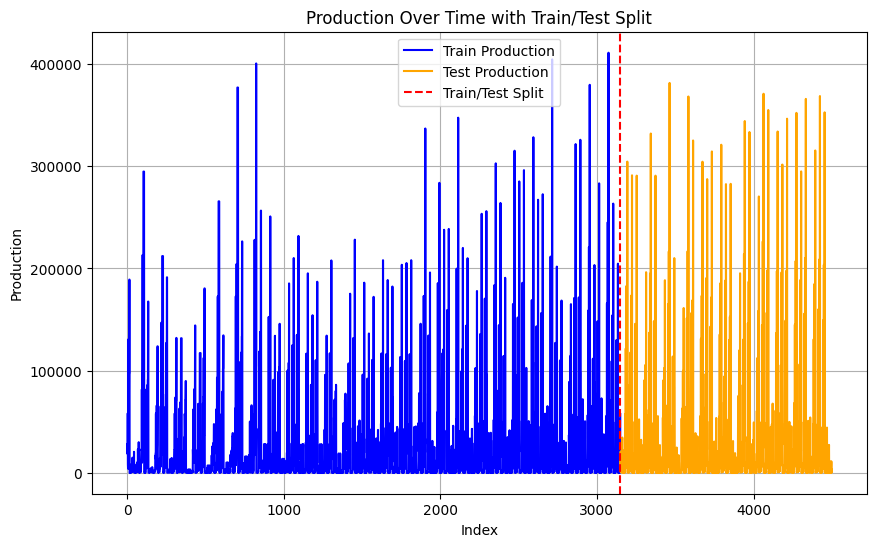

In [11]:
import matplotlib.pyplot as plt

# calculate the indices for the split point
split_index = len(x_train)

# train
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train.values, label='Train Production', color='blue')

# test
plt.plot(y_test.index, y_test.values, label='Test Production', color='orange')

# vertical line for the train/test split
plt.axvline(x=split_index, color='red', linestyle='--', label='Train/Test Split')

# labels and title
plt.xlabel('Index')
plt.ylabel('Production')
plt.title('Production Over Time with Train/Test Split')

plt.legend()
plt.grid(True)
plt.show()


### Creating copy of the dataset (x_test values)

In [12]:
dataset_test = x_test.copy()

### Adding new column to the dataset

In [13]:
dataset_test['Actual_Production'] = y_test.values

# Linear Regression

In [14]:
# Scaling the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
# Initializing and fit the model
linearRegression = LinearRegression()
linearRegression.fit(x_train_scaled, y_train)

LinearRegression()

In [16]:
# Evaluate the model on the test set
y_pred = linearRegression.predict(x_test_scaled)

Cross-validation

In [17]:
# Cross-validation (Linear Regression)
cv_scores = cross_val_score(linearRegression, x_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')  # 5-fold CV
print(f"Cross-validation Mean MSE: {-cv_scores.mean()}")

Cross-validation Mean MSE: 144497714.1737368


# Prediction

In [19]:
# predicting production using Linear Regression
pred_linearReg_prod = linearRegression.predict(x_test_scaled)

dataset_test["LR Production Prediction"] = pred_linearReg_prod

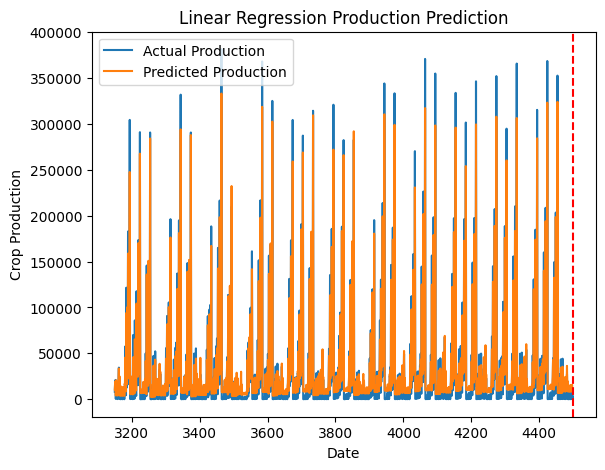

In [20]:
# Data Visualization
ax = dataset_test['Actual_Production'].plot(figsize=(6.5, 5), label="Actual Production")
dataset_test["LR Production Prediction"].plot(ax=ax, label="Predicted Production")
ax.axvline(x=dataset_test.index[-1], color='red', ls='--')  # Add a line to indicate the split (last data point)

plt.xlabel("Date")
plt.ylabel("Crop Production")
plt.title("Linear Regression Production Prediction")
plt.legend(loc="upper left")
plt.show()


#Evaluation Metrics

MSE & R2

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE and R2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 91746824.53068545
R-squared: 0.9736804949660358


RMSE

In [22]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 9578.456270750807


MAPE

In [23]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape}')


Mean Absolute Percentage Error: 45.41163745582623


# Improve Performance